In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from treehopper.hoppers import hopper
import treehopper.explore as e
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc

In [3]:
rgauss = np.random.normal(size=(1000,2))

h = hopper(rgauss)
h.hop(10)
h.hop(20)

beginning traversal!


[236,
 140,
 988,
 98,
 67,
 30,
 887,
 638,
 668,
 680,
 448,
 495,
 796,
 949,
 332,
 155,
 759,
 784,
 132,
 289,
 556,
 933,
 220,
 463,
 764,
 531,
 529,
 68,
 744,
 386]

Trying to set attribute `.obs` of view, making a copy.


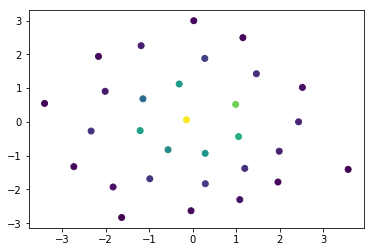

In [4]:
rgauss = sc.AnnData(rgauss)

smaller = e.compress(rgauss, h)
plt.scatter(smaller.X[:,0],smaller.X[:,1], c=list(smaller.obs['wt']))
plt.show()

In [11]:
sc.pp.neighbors(smaller)

/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

In [14]:
sc.tl.louvain(smaller)

In [22]:
c1=e.filter(smaller, 'louvain',['1'])

In [26]:
expanded = e.expand(c1, rgauss)

[98, 30, 680, 495, 759, 933, 463, 764, 68, 744]
[887, 132, 132, 68, 531, 155, 132, 236, 784, 764, 236, 332, 132, 220, 764, 236, 556, 531, 132, 67, 132, 784, 495, 764, 764, 220, 236, 531, 132, 132, 30, 236, 988, 67, 796, 495, 495, 887, 236, 386, 386, 132, 887, 744, 332, 495, 495, 220, 531, 764, 132, 764, 67, 796, 949, 386, 68, 887, 236, 887, 132, 531, 784, 30, 448, 495, 386, 67, 68, 764, 531, 784, 132, 67, 386, 386, 236, 386, 796, 236, 529, 236, 796, 132, 132, 764, 529, 386, 764, 556, 764, 386, 386, 796, 132, 495, 764, 236, 98, 236, 386, 495, 531, 132, 132, 236, 236, 680, 386, 236, 132, 796, 638, 132, 764, 531, 764, 463, 764, 386, 132, 887, 495, 132, 448, 764, 680, 386, 887, 236, 887, 495, 132, 132, 332, 236, 448, 495, 887, 67, 140, 764, 132, 132, 495, 796, 784, 680, 236, 531, 386, 236, 495, 764, 386, 155, 887, 933, 933, 796, 68, 332, 132, 386, 531, 67, 495, 887, 796, 495, 236, 236, 531, 289, 764, 68, 796, 332, 132, 796, 933, 386, 796, 764, 132, 949, 668, 796, 236, 495, 495, 236, 386, 2

In [19]:
list(smaller.obs['louvain'])

['0',
 '2',
 '2',
 '1',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2']

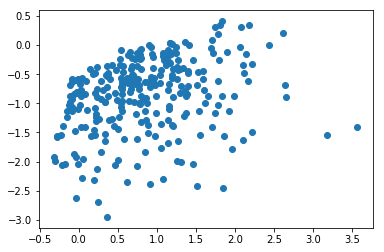

In [27]:
plt.scatter(expanded.X[:,0], expanded.X[:,1])

In [7]:
np.where([x in [1,2] for x in [1,2,3,4,5]])[0]

array([0, 1])

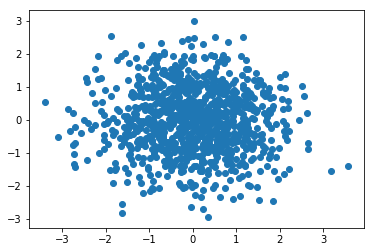

In [8]:
plt.scatter(rgauss.X[:,0],rgauss.X[:,1])